<div style="width: 400px; height: 160px;">
    <img src="rplogo_small.png" width="100%" height="100%" align="left">
</div>

###     TIPP - AAI Assignement (Deep Learning Fundamentals)<br>Due Date: 26 February 2020
###     Submitted By: <u>KOAY</u> SENG TIAN<br>Email: sengtian@yahoo.com


In [1]:
# TIPP - AAI Assignment (Deep Learning Fundamentals)
# Date Due: 26 February 2020
# Submited By: KOAY SENG TIAN
# Email: sengtian@yahoo.com
#
# GitHub: https://github.com/koayst/rp_deeplearning_assignment
#
# Note: source of below statement => sonar.names
# https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29
# Gorman and Sejnowski further report that a nearest neighbor classifier on
# the same data gave an 82.7% probability of correct classification.

from keras import models
from keras import layers
from keras import losses
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np
import os
import pandas as pd

pd.set_option('display.max_rows', 220)

# for reproducibility
np.random.seed(1337)

# verbose mode - 0=show little info, 1=show more info like charts
#verbose=0
verbose=1


Using TensorFlow backend.


In [2]:
def load_data():
    # the dataset files are stored under the 'data' directory
    filedir = os.path.join(os.getcwd(), 'data')
    mines_filename = 'sonar.mines'
    rocks_filename = 'sonar.rocks'
    sonar_filename = 'sonar.all-data'

    # load the data file
    file = os.path.join(filedir, sonar_filename)
    df = pd.read_csv(file, sep=',', header=None)
    
    # create the header for the dataframe
    # the header starts with 'A' followed by a number
    header = [f"A{x:02d}" for x in range(1, df.shape[1])]
    # the last column is named as 'C' as in 'Class'
    header.append('C')
    df.columns = header
    
    return df


In [3]:
def exploratory_data_analysis(df):
    print('Any null ?', end=' ')
    print(df.isnull().values.any())
    print()
    print('NULL count in each column:')
    print(df.isnull().sum())
    print()
    print('Any NaN ?', end=' ')
    print(sonar_df.isna().any().any())
    print()
    print('ZERO count in each column:')
    # columns 42 to 59 have 0 values, but it is still OK
    # as the document said 'each pattern is a set of 60 
    # numbers in the range 0.0 to 1.0 [file: sonar.names]
    print(df.eq(0).sum())
    print()
    
    # True if the dtype is object (categorical), otherwise False
    mask = sonar_df.dtypes == np.object
    # Extract column names that are categorical
    categorical_cols = sonar_df.columns[mask]
    print('What are the categorical column(s)?', end=' ')
    print(categorical_cols)
    print()
   
    # Extract categorical data
    categorical_data = sonar_df.select_dtypes(include=['object']).copy()
    
    # Count the number of cateory for each column
    print('Unique value count of categorical columns:')
    unique_values_counts = (categorical_data.apply(lambda x: x.nunique()).sort_values(ascending=False))
    print(unique_values_counts)
    print()
    
    print('Unique value of categorical columns:')
    print(categorical_data.apply(pd.Series.value_counts))
    

In [4]:
def charts(df):
    df.plot.box(figsize=(12,7))
    plt.xticks(np.arange(1, 60, 3), [f"A{x:02d}" for x in range(1, 60, 3)], rotation=45)
    plt.title('Fig 1: Boxplot for A01 - A60 Angles')
    plt.show()
    

(208, 61)

      A01     A02     A03     A04     A05     A06     A07     A08     A09  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

      A10  ...     A52     A53     A54     A55     A56     A57     A58  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

      A59     A60  C  
0  0.0090  0.0032  R  
1  0.0052  0.0044  R  
2  0.0095  0.0078  R  


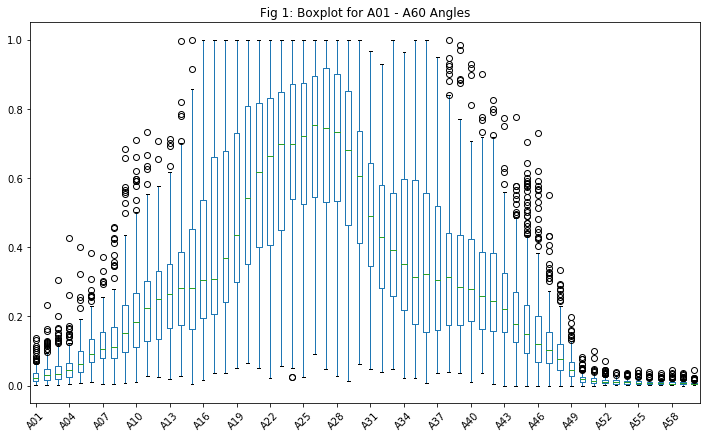

In [5]:
# load the dataset and observe its shape
sonar_df = load_data()
sonar_df.shape

if verbose==1:
    print(sonar_df.head())
    print(sonar_df.tail())
    print()
    print(sonar_df.info())
    print()
    
    # print to observe the min, max values of dataset
    descT = sonar_df.describe().transpose()
    cols = list(descT)

    #move 'max' column next to 'min' column for easy visual comparison
    cols.insert(cols.index('25%'), cols.pop(cols.index('max')))
    descT = descT.loc[:, cols]
    print(descT)
    print()

    charts(sonar_df)
    

In [6]:
# looking at Fig 1. above, the data is normally distributed

if verbose==1:
    exploratory_data_analysis(sonar_df)


Any null ? False

NULL count in each column:
A01    0
A02    0
A03    0
A04    0
A05    0
A06    0
A07    0
A08    0
A09    0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
A17    0
A18    0
A19    0
A20    0
A21    0
A22    0
A23    0
A24    0
A25    0
A26    0
A27    0
A28    0
A29    0
A30    0
A31    0
A32    0
A33    0
A34    0
A35    0
A36    0
A37    0
A38    0
A39    0
A40    0
A41    0
A42    0
A43    0
A44    0
A45    0
A46    0
A47    0
A48    0
A49    0
A50    0
A51    0
A52    0
A53    0
A54    0
A55    0
A56    0
A57    0
A58    0
A59    0
A60    0
C      0
dtype: int64

Any NaN ? False

ZERO count in each column:
A01    0
A02    0
A03    0
A04    0
A05    0
A06    0
A07    0
A08    0
A09    0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
A17    0
A18    0
A19    0
A20    0
A21    0
A22    0
A23    0
A24    0
A25    0
A26    0
A27    0
A28    0
A29    0
A30    0
A31    0
A32    0
A33    0
A34    0
A35    0
A36    0
A37    0
A38    0
A39   

In [7]:
X = sonar_df.drop(columns=['C'])
y = sonar_df['C']

if verbose==1:
    X.head()
    y.head()


,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


0    R
1    R
2    R
3    R
4    R
Name: C, dtype: object

In [8]:
# perform label encoding on Y
lbl_encoder = LabelEncoder()
# encode 'R' as in 'Rock' to 0
# encode 'M' as in 'Mine' to 1
lbl_encoder = LabelEncoder.fit(lbl_encoder, y = ["R", "M"])
y_encoded = lbl_encoder.fit_transform(y)

# perform one hot encoding
y = to_categorical(y_encoded)

# cast X to numpy array
X = X.to_numpy()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [10]:
# perform scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform (X_test)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# check to ensure the shape and 
# data type are what I think it should be
if verbose==1:
    X_train.shape
    type(X_train)
    X_test.shape
    type(X_test)
    y_train.shape
    type(y_train)
    y_test.shape
    type(y_test)

(156, 60)

numpy.ndarray

(52, 60)

numpy.ndarray

(156, 2)

numpy.ndarray

(52, 2)

numpy.ndarray

In [12]:
# build the Artifical Neuro Network layers
network = models.Sequential()
network.add(layers.Dense(240, activation='relu', input_shape=(60,)))
network.add(layers.Dense(240, activation='relu'))
network.add(layers.Dense(240, activation='relu'))
network.add(layers.Dense(2, activation='softmax'))

In [13]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 240)               14640     
_________________________________________________________________
dense_2 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_3 (Dense)              (None, 240)               57840     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 482       
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = network.fit(
                      X_train, y_train, validation_split=0.22, 
                      epochs=20, batch_size=20, shuffle=True, verbose=1
                     )

print()
test_loss, test_acc = network.evaluate(X_test, y_test)

print()
print('test_acc:', test_acc)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 121 samples, validate on 35 samples
Epoch 1/20





121/121 [==============================] - 0s 3ms/step - loss: 0.6318 - acc: 0.6446 - val_loss: 0.4743 - val_acc: 0.8000
Epoch 2/20
121/121 [==============================] - 0s 258us/step - loss: 0.4540 - acc: 0.7686 - val_loss: 0.4169 - val_acc: 0.8286
Epoch 3/20
121/121 [==============================] - 0s 258us/step - loss: 0.2495 - acc: 0.9339 - val_loss: 0.3954 - val_acc: 0.8000
Epoch 4/20
121/121 [==============================] - 0s 262us/step - loss: 0.1834 - acc: 0.9669 - val_loss: 0.3670 - val_acc: 0.8857
Epoch 5/20
121/121 [==============================] - 0s 281us/step - loss: 0.1387 - acc: 0.9835 - val_loss: 0.3529 - val_acc: 0.7429
Epoch 6/20
121/121 [==============================] - 0s 231us/step - loss: 0.0874 - acc: 1.0000 - val_loss: 0.2856 - val_acc: 0.8571
Epoch 7/20
121/121 [==============================]

In [15]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

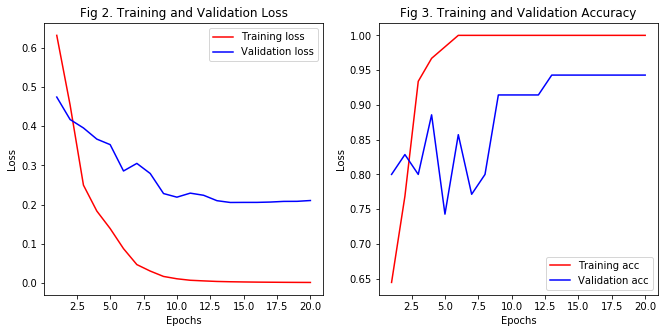

In [16]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#draw chart to show validation vs training losses
ax1.plot(epochs, loss_values, 'r', label='Training loss')
ax1.plot(epochs, val_loss_values, 'b', label='Validation loss')
ax1.title.set_text('Fig 2. Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
#ax1.set_xticks([tick for tick in range(1, len(loss_values), 2)])
ax1.legend()

# draw chart to show validation vs training accuracy
ax2.plot(epochs, acc_values, 'r', label='Training acc')
ax2.plot(epochs, val_acc_values, 'b', label='Validation acc')
ax2.title.set_text('Fig 3. Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
#ax1.set_xticks([tick for tick in range(1, len(val_loss_values), 2)])
ax2.legend()

plt.show()
